# Python for Labs/Lectures

## Lecture 2: Scientific computation in Python

Nicholas Lee-Hone

July 2019

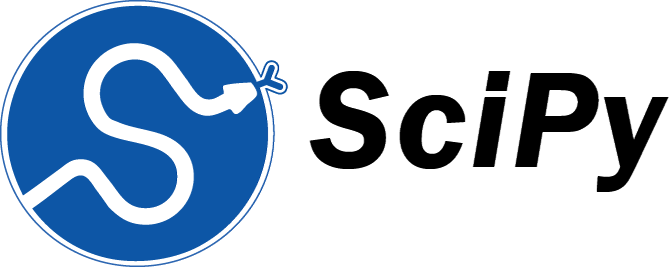

In [ ]:
import numpy as np

Scipy is a Python package that provides a large set of modules which provide mathematical algorithms and convenience functions built on top of NumPy. The main modules we will work with are:

- scipy.constants: Physical constants
- scipy.special: Special functions
- scipy.interpolate: Interpolation of discrete data
- scipy.optimize: Root finding and minimization
- scipy.integrate: General integration functions
- scipy.fftpack: Discrete fourier transform
- scipy.linalg: Linear algebra (adds extra functions on top of what NumPy provides)

There are many other modules that perform other scientific computation tasks:

- scipy.signal: Signal processing
- scipy.spatial: Spatial data structures and algorithms
- scipy.sparse.csgraph: Compressed sparse graph routines
- scipy.sparse: Sparse matrix routines
- scipy.stats: Statistics
- scipy.ndimage: Multidimensional image processing
- scipy.cluster: Clustering algorithms
- scipy.odr: Orthogonal distange regression

These may be useful in specific research contexts but it is unlikely that you will need to use these in a teaching context.

When importing the scipy package it does not automaticaly load all the modules in order to reduce memory consumption. You must manually specify what packages to import.

In [2]:
# Import the special functions module under the scipy package
import scipy.special

scipy.special.ellipk(0.5)

1.8540746773013719

In [ ]:
# You can import the special functions directly
from scipy import special

special.ellipk(0.5)

In [3]:
# Preferred way to do it
import scipy.special  # Load the module
import scipy as sp  # Alias scipy as sp (these two import steps can be done in any order)

sp.special.ellipk(0.5)

1.8540746773013719

Scipy's special functions module has hundreds of functions:

https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special

Elliptic K example:

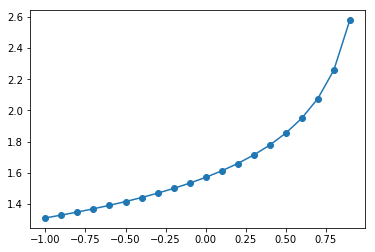

In [5]:
# To help visualize the functions we first load the custom plotting module and NumPy
from plotting import *
import numpy as np

# Create a linearly spaced array
x = np.linspace(-1, 1, 21)
# Calculate the EllipticK function on that array
y = sp.special.ellipk(x)

# Plot the results
plot(x, y)

We will cover plotting in the next lecture, so for now the plot commands will be hidden in the `plotting` module. The `plot` function that is shown above simply takes the x and y coordinates of the points and connects them with 

## Interpolation

- https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

In many cases you may not have an exact form for an equation, but will have some data which you want to either integrate, or find the zero crossings (roots). This is where interpolation becomes important.

For the following examples we will use data from known functions, but this data could also have been loaded via `genfromtxt` or some other means.

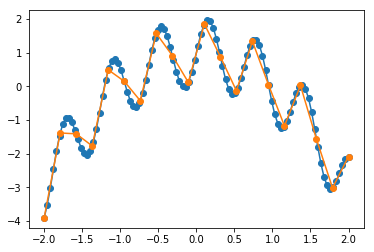

In [6]:
# Plot a higher-resolution version first (in blue)
hires_x = np.linspace(-2, 2, 100)
hires_y = 1 - hires_x**2 + np.sin(10*hires_x)  # y = 1 - x^2 + sin(10x)
plot(hires_x, hires_y)

# This is the data we will work with (orange)
x = np.linspace(-2, 2, 20)
y = 1 - x**2 + np.sin(10*x)
plot(x, y)

In [7]:
# First import the module
import scipy.interpolate

In [15]:
interp = sp.interpolate.interp1d(x, y, kind='cubic')  # Try a few different kinds of interpolation

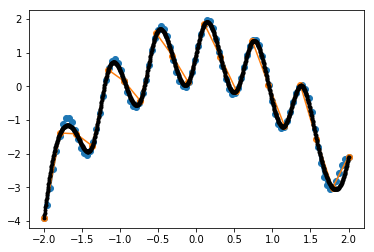

In [16]:
plot(hires_x, hires_y)
plot(x, y)

xs = np.linspace(-2, 2, 1000)
y_interp = interp(xs)  # Use the interpolating function defined above to generate the y values

plot_interp(xs, y_interp)

Now go back and change the interpolation kind to see how things change. Possible values are `linear`, `nearest`, `zero`, `slinear`, `quadratic`, `cubic`, `previous`, `next`. Also change the number of points used in the `linspace` to see how closely the interpolation matches the data that it was provided.

## Root finding

- https://docs.scipy.org/doc/scipy/reference/optimize.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton
- https://en.wikipedia.org/wiki/Newton%27s_method

SciPy has multiple root finding algorithms. The main ones to know about are the `newton` function, and the `root` function. The `root` function is more powerful, but is more of a black-box. The `newton` method converges very quickly if the function is well behaved and the starting estimate is near the root.

In [17]:
# Import the module
import scipy.optimize

In [18]:
# Find the root of the cos function starting from the point x=1
root = sp.optimize.newton(np.cos, x0=1)
root

1.5707963267948966

In [19]:
# Same as above, but with the root function
res = sp.optimize.root(np.cos, x0=1)
res

    fjac: array([[-1.]])
     fun: array([6.123234e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-5.74946219e-12])
       r: array([1.])
  status: 1
 success: True
       x: array([1.57079633])

Note how the `root` function returns extra information about the convergence of the algorithm. You will need to extract the values from the results.

In [20]:
# The sp.optimize.root function can do multi-dimensional root finding, 
# so it returns an array for the root. Extract the value of the root in 
# a 1d problem by selecting element 0 from the array.
res.x[0]

1.5707963267948966

## Lambda functions

Two common uses:
- Nameless function
- Lock-in some parameter values to reduce the number of parameters in a function

In [32]:
# Simplest lambda function that gets called immediately
(lambda x, y: x*2 + y)(3, 4)

10

In [22]:
# The following two function definitions are equivalent

def f(x, y):
    return x*2 + y
print(f(3, 4))

# Assigning a name to the lambda function
f = lambda x, y: x*2 + y
print(f(3, 4))

10
10


Take the Gaussian quadrature function we wrote in Assignment 0, and a normal distribution with parameters $\mu$ and $\sigma$.

It takes a function as an input, and integrates that function, assuming that it has only a single parameter: `f(x)`.

What if the function we were trying to integrate was the normal distribution with three parameters, `norm(x, mu, sigma)`?

In [23]:
def gauss_quad(f, a, b):
    # Takes a function f, and integrates it between bounds a and b
    xs = (0, 0.538469, -0.538469, 0.90618, -0.90618)
    ws = (0.568889, 0.478629, 0.478629, 0.236927, 0.236927)
    result = 0
    for x, w in zip(xs, ws):
        result = result + w*f((b - a)/2*x + (a + b)/2)
    return (b - a)/2*result

# Normal distribution
def norm(x, mu, sigma):
    return 1/((2*np.pi)**0.5*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))

gauss_quad(norm, -1, 1)

TypeError: norm() missing 2 required positional arguments: 'mu' and 'sigma'

Fix this by passing values to the norm function within a lambda function.

In [24]:
gauss_quad(lambda x: norm(x, 0, 1), -1, 1)

0.6826901056260652

This is exactly equivalent to the following:

In [25]:
def norm1(x):
    return norm(x, 0, 1)

gauss_quad(norm1, -1, 1)

0.6826901056260652

But this is much more clunky, and you have to remember what values were assigned to mu and sigma, instead of being able to see them directly in the lambda function.

## Passing arguments

There is another way to implement extra argument passing, which involves using an extra keyword argument. Let's change the definition of the `gauss_quad` so it looks like:

In [26]:
def gauss_quad(f, a, b, args=()):
    # Takes a function f, and integrates it between bounds a and b
    xs = (0, 0.538469, -0.538469, 0.90618, -0.90618)
    ws = (0.568889, 0.478629, 0.478629, 0.236927, 0.236927)
    result = 0
    for x, w in zip(xs, ws):
        result = result + w*f((b - a)/2*x + (a + b)/2, *args)  # Note the *args here
    return (b - a)/2*result

We add an extra `args=()` keyword, which passes by default an empty tuple. In the call to the function, we add `*args`, which unpacks the args tuple into the remaining function parameters.

`f(x, *args)` is equivalent to `f(x, args[0], args[1], ..., args[N-1])`, but works without needing to know ahead of time how many arguments there are.

Now we can use the original norm function that takes three parameters, making sure to pass the mu and sigma via the `args=(0, 1)` parameter.

In [27]:
gauss_quad(norm, -1, 1, args=(0, 1))

0.6826901056260652

Most scientific computation packages follow this convention. The first argument is a function that takes any number of parameters. The first parameter is expected to be the variable of interest, and the other parameters are expected to be filled by the args keyword.

With this in mind, not all functions will have the variable of interest as their first parameter. How can we deal with this? `lambda` functions. Let's re-write the norm function from before, but put `x` as the second parameter and shuffle the order of sigma and mu.

In [29]:
# Norm does not have x as the first parameter
def norm(sigma, x, mu):
    return 1/((2*np.pi)**0.5*sigma)*np.exp(-(x - mu)**2/(2*sigma**2))

In [30]:
# This fails because it is trying to integrate over sigma, with x=0 and mu = 1.
gauss_quad(norm, -1, 1, args=(0, 1))

ZeroDivisionError: float division by zero

In [31]:
# Use a lambda function to re-write the order of the variables
gauss_quad(lambda x, mu, sigma: norm(sigma, x, mu), -1, 1, args=(0, 1))

0.6826901056260652

Note how the lambda function this time takes three parameters, in the order we would like to see them, and passes those to the `norm` function in the correct positions.

## Integration

- https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate
- http://phy224.ca/07-numpy/index.html (last section)

We have already seen integration by going through the `gauss_quad` example. The SciPy integrators are however much more sophisticated, and can deal with improper integrals.

In [33]:
import scipy.integrate  # Load the module

In [34]:
sp.integrate.quad(lambda x, mu, sigma: norm(sigma, x, mu), -1, 1, args=(0, 1))

(0.682689492137086, 7.579375928402476e-15)

The main additional piece of information that SciPy provides is an estimate of the error on the integral as the second part of the tuple it returns.

There are many specialized integrators available in SciPy. They can be found here: https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate

It fails because the `norm` function expects two more arguments than what `gauss_quad` is providing. However we can use `lambda` functions to lock-in the mu and sigma variables so that the integration works.

## Solving ODEs

https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate

In [35]:
# Import the integrate module to get access to the ODE solvers
import scipy.integrate

There are two interfaces to solving ODEs in SciPy: `odeint` and `solve_ivp`. The latter is the more recent implementation, but most tutorials still use `odeint`.

ODEs in SciPy are solved by writing out the equations in a function and passing that function to `solve_ivp` along with the range over which to integrate and the initial conditions.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

Solve the following IVP from $x=0$ to $x=5$:

$$\frac{dy}{dx} - \frac{2}{y} + 3\sin(x)=0$$
with $y(0) = 0.5$.


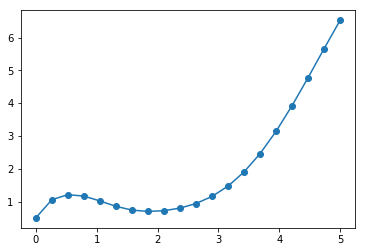

In [36]:
def dy_dx(x, y):
    return 2/y - 3*np.sin(x)

xs = np.linspace(0, 5, 20)

# The solver takes the ODE function, the range over which to integrate
# initial conditions with keyword y0=[], and an array of points where
# we want to evaluate the solution in t_eval.

# The results are then available in the res.y[0] array.

res = sp.integrate.solve_ivp(dy_dx, [0, 5], y0=[0.5], t_eval=xs)
plot(xs, res.y[0])

In order to solve a second order ODE rewrite it as two first order ODEs.

E.g.

$$y'' - y' - \sin(y) - \cos(x) = 0$$

with $y(0)=1$ and $y'(0)=-0.1$.

Let $v_2 = y'$, $v_1=y$, then

$$v_2' = v_2 + \sin(v_1) + \cos(x)$$
$$v_1' = v_2$$

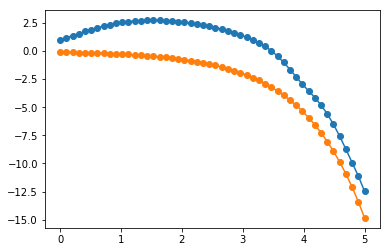

In [37]:
# v[0] is going to be y
# v[1] is going to be y'
def func(x, v):
    v1 = v[0]
    v2 = v[1]
    return (v2 + np.sin(v1) + np.cos(x), v2)


xs = np.linspace(0, 5, 50)
# Note that the y0=[1, -1] applies to the initial conditions for v1 and v2
res = sp.integrate.solve_ivp(func, [0, 5], y0=[1, -0.1], t_eval=xs)
plot(xs, res.y[0])
plot(xs, res.y[1])